## Hacker statistics - Simulating 4 coin flips

In [1]:
import numpy as np
np.random.seed(42)
random_numbers = np.random.random(size=4)
random_numbers

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [2]:
heads = random_numbers < 0.5
heads

array([ True, False, False, False])

In [3]:
np.sum(heads)

1

In [4]:
n_all_heads = 0  # Initialize number of 4-heads trials
for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1

n_all_heads / 10000

0.0619

## Exercise: Generating random numbers using the np.random module

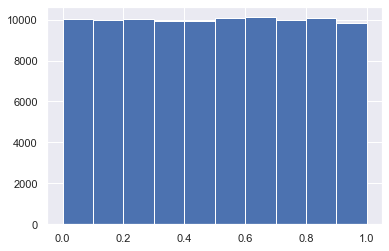

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

## Exercise: The np.random module and Bernoulli trials

In [6]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

## How many defaults might we expect?
 - Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05.
 - To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) 
 - You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

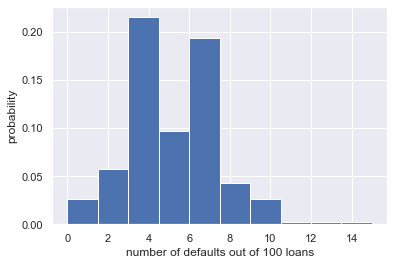

In [7]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)  # the height of the bars of the histogram indicates the probability
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

## Exercise: Will the bank fail?

In [8]:
# ECDF(Empirical cumulative distribution function)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

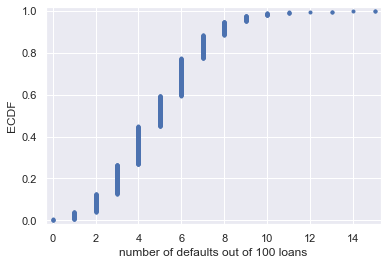

Probability of losing money = 0.022


In [9]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('ECDF')
plt.margins(0.02)  # Keeps data of plot edges

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

## Binomial distribution: the story
 - The number r of successes in n Bernoulli trials with probability p of success, is Binomially distributed
 - The number r of heads in 4 coin flips with probability 0.5 of heads, is Binomially distributed

## Sampling from the Binomial distribution

In [10]:
np.random.binomial(4, 0.5)

2

In [11]:
np.random.binomial(4, 0.5, size=10)

array([2, 2, 2, 2, 2, 3, 3, 2, 2, 0])

In [12]:
np.mean(np.random.binomial(4, 0.5, size=10000))

1.997

## The Binomial PMF
 - PMF (Probability mass function): The set of probabilities of discrete outcomes

In [13]:
n = 60
p = 0.1
samples = np.random.binomial(n, p, size=10000)

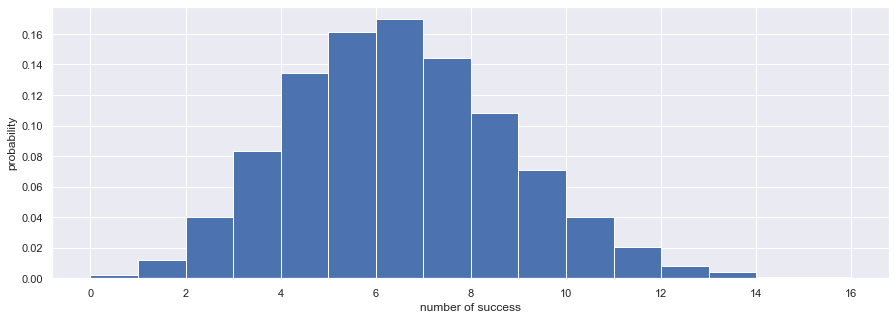

In [14]:
plt.figure(figsize=(15, 5))
plt.hist(samples, density=True, bins=len(np.unique(samples))-1)
plt.xlabel('number of success')
plt.ylabel('probability')
plt.show()

## The Binomial CDF

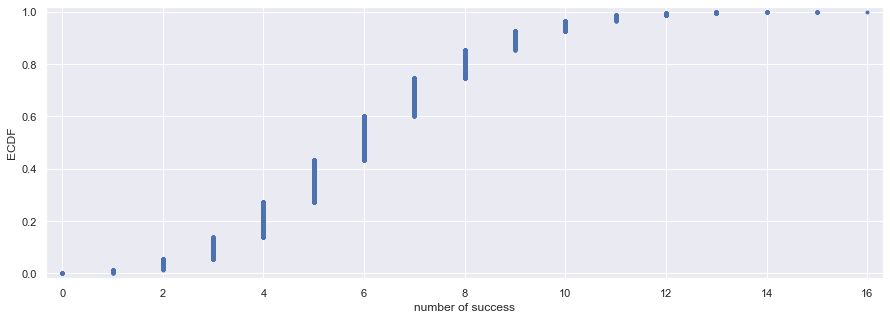

In [15]:
x, y = ecdf(samples)

plt.figure(figsize=(15, 5))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('number of success')
plt.ylabel('ECDF')
plt.margins(0.02)  # Keeps data of plot edges

plt.show()

## Exercise: Sampling out of the Binomial distribution

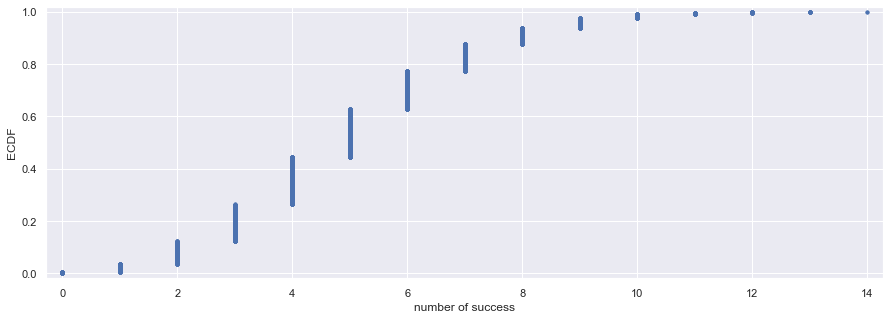

In [16]:
np.random.seed(42)

# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100, 0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.figure(figsize=(15, 5))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('number of success')
plt.ylabel('ECDF')
plt.margins(0.02)  # Keeps data of plot edges

# Show the plot
plt.show()

## Exercise: Plotting the Binomial PMF

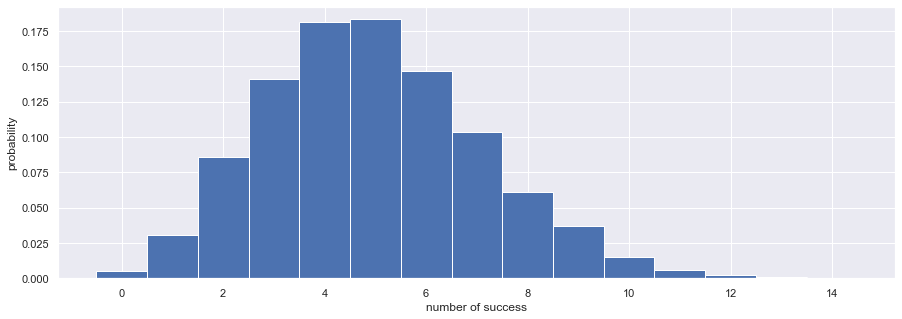

In [17]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.figure(figsize=(15, 5))
plt.hist(n_defaults, density=True, bins=bins)

# Label axes
plt.xlabel('number of success')
plt.ylabel('probability')

# Show the plot
plt.show()

## Poisson process
 - The timing of the next event is completely independent of when the previous event happened
 
## Examples of Poisson processes
 - Natural births in a given hospital
 - Hit on a website during a given hour
 - Meteor strikes
 - Molecular collisions in a gas
 - Aviation incidents
 - Buses in Poissonville

## The Poisson CDF
 - The number r of hits on a website in one hour with an average hit rate of 6 hits per hour is Poisson distributed
 - So, the Poisson distribution with arrival rate equal to 'np' approximates a Binomial distribution for 'n' Bernoulli trials with probability 'p' of success (with 'n' large and 'p' small)

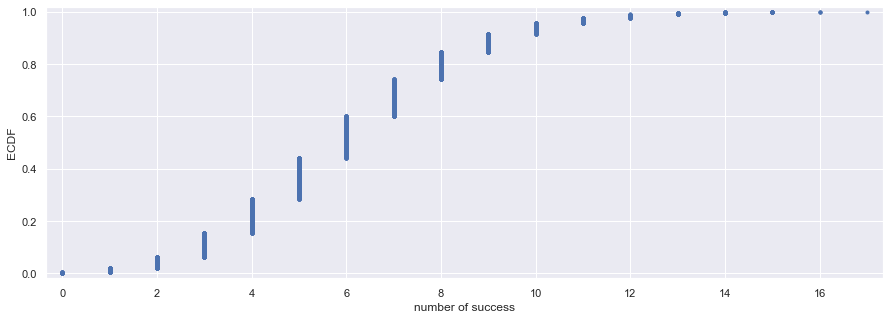

In [18]:
n_p = 6
samples = np.random.poisson(n_p, size=10000)

x, y = ecdf(samples)

plt.figure(figsize=(15, 5))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('number of success')
plt.ylabel('ECDF')
plt.margins(0.02)  # Keeps data of plot edges

plt.show()

In [19]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p (such that n_p is always 10)
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.0421 3.1718334745065038
n = 20 Binom: 10.0064 2.2476563438390667
n = 100 Binom: 9.9371 2.980091204980143
n = 1000 Binom: 10.0357 3.16430490155421


The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.

## Exercise: Was 2015 anomalous?
 - 1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season

In [20]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0072
